In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
retail_df = pd.read_csv('retail_sales_dataset.csv')

In [3]:
# Display the first few rows of the dataset
print(retail_df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
# Check for missing values
print("Missing Values:")
print(retail_df.isnull().sum())

Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
# Drop rows with missing values or handle them appropriately
# (e.g., impute missing values based on the context)
retail_df = retail_df.dropna()

In [6]:
# Check for duplicate rows
print("Duplicate Rows:")
print(retail_df.duplicated().sum())

Duplicate Rows:
0


In [7]:
# Drop duplicate rows if necessary
retail_df = retail_df.drop_duplicates()

In [8]:
# Ensure data types are appropriate
retail_df['Date'] = pd.to_datetime(retail_df['Date'])

In [9]:
# Display the cleaned dataset
print("Cleaned Dataset:")
print(retail_df.head())

Cleaned Dataset:
   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [10]:
# Calculate basic statistics
mean_price = retail_df['Price per Unit'].mean()
median_quantity = retail_df['Quantity'].median()
mode_age = retail_df['Age'].mode().values[0]
std_total_amount = retail_df['Total Amount'].std()

# Display the calculated statistics
print("Descriptive Statistics:")
print(f"Mean Price per Unit: {mean_price}")
print(f"Median Quantity: {median_quantity}")
print(f"Mode Age: {mode_age}")
print(f"Standard Deviation of Total Amount: {std_total_amount}")


Descriptive Statistics:
Mean Price per Unit: 179.89
Median Quantity: 3.0
Mode Age: 43
Standard Deviation of Total Amount: 559.997631555123


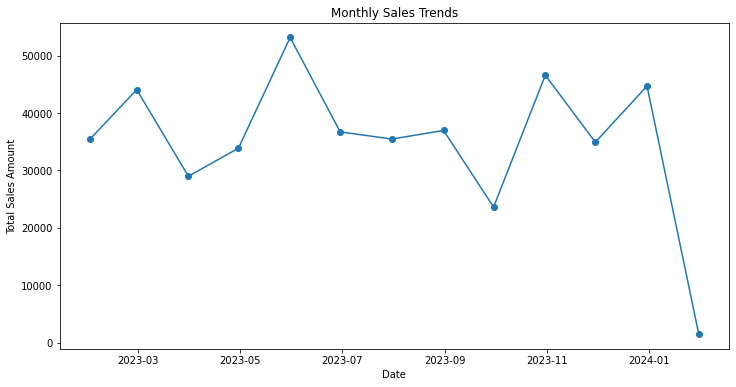

In [11]:
# Set the 'Date' column as the index for time series analysis
retail_df.set_index('Date', inplace=True)

# Resample data to monthly frequency and analyze trends
monthly_sales = retail_df['Total Amount'].resample('M').sum()

# Visualize time series trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()


In [12]:
# Analyze customer demographics
customer_demographics = retail_df.groupby('Gender')['Age'].mean()

# Analyze purchasing behavior
product_sales = retail_df.groupby('Product Category')['Quantity'].sum()

# Display the results
print("Customer Demographics:")
print(customer_demographics)
print("\nProduct Sales:")
print(product_sales)


Customer Demographics:
Gender
Female    41.356863
Male      41.428571
Name: Age, dtype: float64

Product Sales:
Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


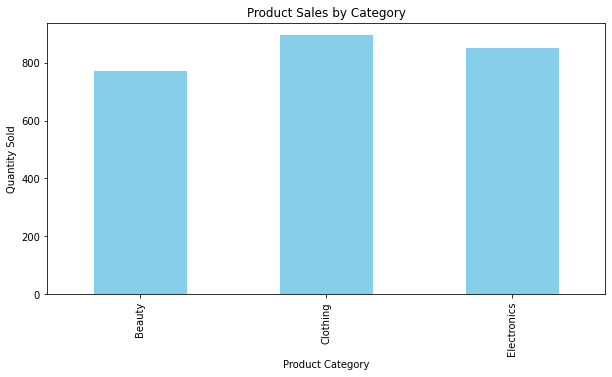

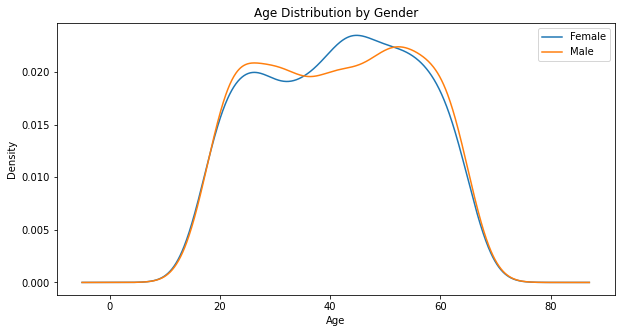

In [13]:
# Bar chart for product sales
plt.figure(figsize=(10, 5))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Product Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

# Line plot for age distribution by gender
plt.figure(figsize=(10, 5))
retail_df.groupby('Gender')['Age'].plot(kind='kde', legend=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
